# Deutsch Oracle
Black-Box program that performs some unknown function.

In [149]:
# useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, IBMQ, execute

# import basic plot tools
from qiskit.tools.visualization import matplotlib_circuit_drawer as circuit_drawer
from qiskit.tools.visualization import plot_histogram, qx_color_scheme

### <center>Identity Function</center>
\begin{equation*}
f(x) = x
\end{equation*}

In [136]:
def identity(q,BB): 
    """Returns Identity Function
    Qin = Input Qbit
    Qout = Out Qbit
    BB = Q Circuit
    """
    BB.cx(q[0],q[1])

### Constant 1
\begin{equation*}
f(x) = 1
\end{equation*}

In [137]:
def con1(q,BB):   
    """Returns 1
    """
    BB.x(q[1])

### <center>Bit Flip</center>
\begin{equation*}
f(x)  = \overline{x}
\end{equation*}

In [138]:
def BitFlip(q,BB):
    """Returns complement\n
    """
    BB.cx(q[0],q[1])
    BB.x(q[1])

In [200]:
def BlackBox(inp):
    # Creating registers
    q = QuantumRegister(2)
    t = ClassicalRegister(2) 
    BB = QuantumCircuit(q, t)
    BB.x(q[0])
    BB.x(q[1])
    BB.h(q[0])
    BB.h(q[1])
    if(inp == "bf"):
        BitFlip(q,BB)
    elif(inp == "id"):
        identity(q,BB)
    elif(inp=="con1"):
        con1(q,BB)
    BB.h(q[0])
    BB.h(q[1])
    BB.measure(q[0],t[0])
    BB.measure(q[1],t[1])
    return BB

C:\Users\Vinu\Anaconda3\envs\QISKitenv\lib\site-packages\qiskit\tools\visualization\_circuit_visualization.py:544: DeprecationWarning: The matplotlib_circuit_drawer() function is deprecated and will be removed in a future release. Instead use the circuit_drawer() function with the `output` kwarg set to `mpl`.
  '`mpl`.', DeprecationWarning)


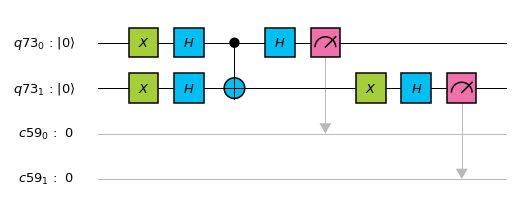

In [218]:
BB = BlackBox("bf")
circuit_drawer(BB,style=qx_color_scheme())

In [219]:
local_backend = Aer.get_backend('qasm_simulator') 
BB_j = execute(BB, local_backend) 
BB_j = BB_j.result()
data = BB_j.get_counts(BB)

In [220]:
print(data)

{'10': 1024}
